In [1]:
from Phosphorpy import DataSet
from astropy.table import Table
from astropy import units as u
import numpy as np
import os
Table.read('/Users/patrickr/Documents/temp/comb_ra_lte_180.fits')[:10].write('temp.fits')
ds = DataSet.load_coordinates('temp.fits', 'fits','ra', 'dec')
os.remove('temp.fits')

# Additional data
Besides photometric surveys, two kind of data can be retrieved through Phosphorpy. As explained in the Light curves section, light curves from the [Catalina Sky Survey (CSS)](http://nesssi.cacr.caltech.edu/DataRelease/) can be obtained and the second kind of data are images from [SDSS](https://www.sdss.org/) or [Pan-STARRS](https://panstarrs.stsci.edu/). 

## CSS light curves
[see light curves](Light-curves)

## Images
As mentioned before, at the moment are two sources for the retrieval of images are implemented [SDSS](https://www.sdss.org/) and [Pan-STARRS](https://panstarrs.stsci.edu/) images. By default a color image (RGB style) out of three different images with a size of 2 arcmin X 2 arcmin is created. For [SDSS](https://www.sdss.org/) the default bands are u, g, and z and for [Pan-STARRS](https://panstarrs.stsci.edu/) the default bands are g, r, and z but other combinations can be used too.

### Image processing
To create a better (nicer) color image out of the original images the images are preprocessed. 
First, NaN values, for instance caused by dead pixels or by other problems in the pipeline of the surveys, are excluded. Next, the background is subtracted from the images. The background is estimated by first computing the median of each row, and then by computing the median of the median. This gives a more robust background estimate than just the median of the complete image.<br>
The maximum value of the pixels in the color bar is set to the median of the target source's central 4x4 pixels. Because of this setting, the central (selected) source will be white, regardless of the real color of the source. Also the central pixel will have the median value of the section, which can, in the case of faint sources, result in a slightly misleadingly bright center.<br>

**WARNING**: This processing assumes that a source is at the coordinates. If no source or a extremely faint one is located there, the image plotting will fail.

To reduce the background noise, which will be still present also after the background subtraction of course, every image is smoothed 2 times by default. For the smoothing the kernel
<img src="https://latex.codecogs.com/gif.latex?%5Cbegin%7Bbmatrix%7D%200%20%26%201%20%26%200%5C%5C%201%20%26%204%20%26%201%5C%5C%200%20%26%201%20%26%200%20%5Cend%7Bbmatrix%7D"> is used. 

### Usage
We start with a data-set **ds** with a set of coordinates in it. After that, a single image from Pan-STARRS with the default colors can be downloaded by

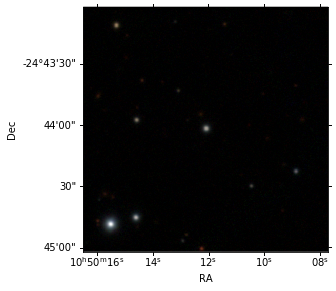

In [2]:
ds.images('PS', 1, './images/')

and it will be stored in 'images' with the coordinates as the image name. If the a SDSS image is required instead of a Pan-STARRS image, 'PS' has to replaced with 'SDSS'.<br>
To set a different combination of filters, the bands have to given via the keyword **bands** as below:

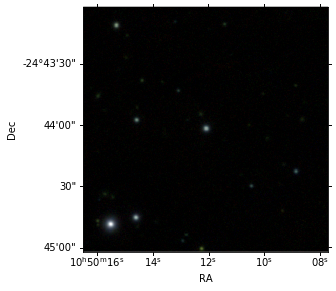

In [3]:
ds.images('PS', 1, './images/', bands=['y', 'z', 'r'])

It doesn't matter if the bands are in a tuple, a list or a numpy array as long they have three elements.

Also the size if the image(s) can be customize. To do that, the keyword **size** has to be set as a float or as a astropy Quantity. If it is a float, the units will be arcmin.

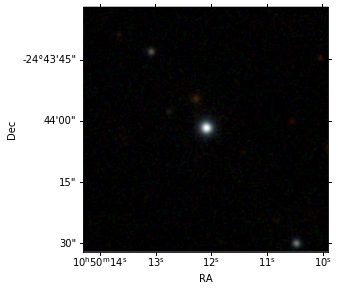

In [5]:
ds.images('PS', 1, './images/', size=1*u.arcmin)

**WARNING**: SDSS provides the images from the camera directly and not like Pan-STARRS a combined cutout. Therefore the image with the closest coordinates is taken and because of that, it can happen, that a target will be at the edge of the image.


An alternative way to download all images is to call **all_images** instead of iterating over all image ids. The interface is the same as that for **images** except that the second argument, the source id, is removed:

In [ ]:
ds.all_images('PS', './images/')

As in the case of the single image, also a different combination of bands or different sizes can be used.